# TITLE

In [74]:
import pandas as pd
import numpy as np
import statistics as stats
from  collections import Counter

## Explore Electric Vehicle Data for the State of Washington

In [75]:
electric_vehicle_df = pd.read_csv("./data/Electric_Vehicle_Population_Data.csv")

In [76]:
electric_vehicle_df.head()

VIN (1-10)    County      City State  Postal Code  Model Year     Make  \
0  KM8K33AGXL      King   Seattle    WA      98103.0        2020  HYUNDAI   
1  1C4RJYB61N      King   Bothell    WA      98011.0        2022     JEEP   
2  1C4RJYD61P    Yakima    Yakima    WA      98908.0        2023     JEEP   
3  5YJ3E1EA7J      King  Kirkland    WA      98034.0        2018    TESLA   
4  WBY7Z8C5XJ  Thurston   Olympia    WA      98501.0        2018      BMW   

            Model                   Electric Vehicle Type  \
0            KONA          Battery Electric Vehicle (BEV)   
1  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  GRAND CHEROKEE  Plug-in Hybrid Electric Vehicle (PHEV)   
3         MODEL 3          Battery Electric Vehicle (BEV)   
4              I3  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             258   
1             Not eligible due to low battery range              25   
2             Not eligible due to low battery range              25   
3           Clean Alternative Fuel Vehicle Eligible             215   
4           Clean Alternative Fuel Vehicle Eligible              97   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  43.0       249675142   
1          0                   1.0       233928502   
2          0                  14.0       229675939   
3          0                  45.0       104714466   
4          0                  22.0       185498386   

                  Vehicle Location  \
0     POINT (-122.34301 47.659185)   
1     POINT (-122.20578 47.762405)   
2  POINT (-120.6027202 46.5965625)   
3     POINT (-122.209285 47.71124)   
4     POINT (-122.89692 47.043535)   

                                Electric Utility  2020 Census Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303300e+10  
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
2                                     PACIFICORP       5.307700e+10  
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
4                         PUGET SOUND ENERGY INC       5.306701e+10

In [1]:
#Explore
print('Shape\n', electric_vehicle_df.shape)
print('\n')
print("Duplicates\n", electric_vehicle_df.duplicated().sum())
print('\n')
print('Null\n', electric_vehicle_df.isnull().sum())
print('\n')
print('Describe Numbers\n', electric_vehicle_df.describe())
print('\n')
print('Describe Strings\n', electric_vehicle_df.describe(include='object'))
print('\n')
print('Columns\n', electric_vehicle_df.columns)
print('\n')
print('Correlation\n', electric_vehicle_df.corr())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3100311443.py, line 12)

As we can see there are many 0 values throughout columns such as base MSRP and Electric Range, therefore, we will discard these columns as they are not relevant to our research. Additionally, location information is captured in several locations such as county, postal code, vehicle location, and 2020 Census Tract. We should only consider County from income data set as that is the only way to join the two.

We will begin first by dropping columns that have majority of 0 data and hard to work with location data. Then we will verify that all car data is from Washington.

In [78]:
electric_vehicle_df.drop(columns=["Electric Range", "Base MSRP", "Vehicle Location", "2020 Census Tract"], inplace=True)

In [79]:
print(electric_vehicle_df.loc[electric_vehicle_df['State'] != "WA"].count())

VIN (1-10)                                           341
County                                               338
City                                                 338
State                                                341
Postal Code                                          338
Model Year                                           341
Make                                                 341
Model                                                341
Electric Vehicle Type                                341
Clean Alternative Fuel Vehicle (CAFV) Eligibility    341
Legislative District                                   0
DOL Vehicle ID                                       341
Electric Utility                                     338
dtype: int64


In [80]:
electric_vehicle_df = electric_vehicle_df.loc[electric_vehicle_df['State'] == "WA"]

In [81]:
print(electric_vehicle_df['Legislative District'].isnull().sum())

0


In [96]:
#Get Class Distributions
electric_vehicle_df_length = len(electric_vehicle_df["County"])
for col in electric_vehicle_df:
    count_counter = Counter(electric_vehicle_df[col])
    percent_values=[(i, count_counter[i] / electric_vehicle_df_length) for i in count_counter.most_common()]
    print("Percent class distribution of ", col)
    print(percent_values)
    print('\n')

Percent class distribution of  VIN (1-10)
[('7SAYGDEE7P', 0.005374947549303654), ('7SAYGDEE6P', 0.005334985113992847), ('7SAYGDEE2P', 0.005161814560979346), ('7SAYGDEE8P', 0.005161814560979346), ('7SAYGDEEXP', 0.0051351729374388075), ('7SAYGDEE0P', 0.00508188969035773), ('7SAYGDEE5P', 0.005075229284472595), ('7SAYGDEE9P', 0.005035266849161788), ('7SAYGDEE4P', 0.004955341978540172), ('7SAYGDEE1P', 0.004955341978540172), ('7SAYGDEE3P', 0.004935360760884768), ('5YJYGDEE0M', 0.0031503719836686846), ('5YJYGDEE9M', 0.003110409548357877), ('5YJYGDEE7M', 0.0030771075189322036), ('5YJYGDEE8M', 0.0029838618365403188), ('5YJYGDEE2M', 0.002923918183574107), ('5YJYGDEE6M', 0.0029039369659187033), ('5YJYGDEEXM', 0.0028639745306078953), ('5YJYGDEE3M', 0.0028573141247227605), ('7SAYGDEEXN', 0.0028040308776416836), ('5YJYGDEE4M', 0.002777389254101145), ('5YJYGDEE1M', 0.002777389254101145), ('7SAYGDEE8N', 0.002744087224675472), ('5YJYGDEE5M', 0.0027307664129052026), ('7SAYGDEE4N', 0.0026508415422835867)

array([[<Axes: title={'center': 'Model Year'}>]], dtype=object)

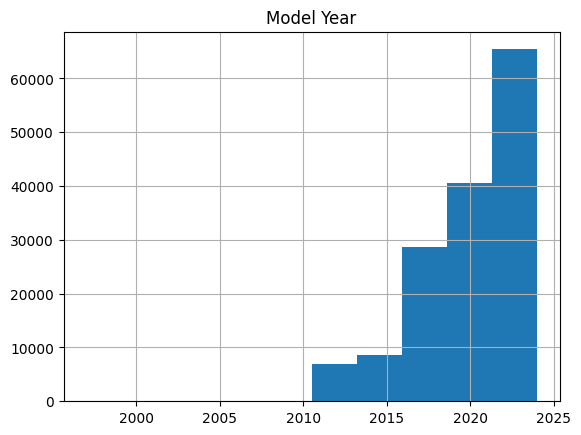

In [82]:
electric_vehicle_df.hist(column="Model Year")

##### TODO FOR VEHICLE DF
Remove Noisy Location Data

Outliers

T Score check

Scaling

## Explore Washington Income Data

In [137]:
income_df = pd.read_csv("./data/median_household_income_estimates.csv",  thousands=',')

In [138]:
income_df.head()

Unnamed: 0     1989     1990     1991     1992     1993     1994     1995  \
0         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1  Washington  31183.0  33417.0  34379.0  35882.0  36679.0  37895.0  38997.0   
2       Adams  24604.0  28024.0  27301.0  28328.0  31277.0  29537.0  29604.0   
3      Asotin  22897.0  24206.0  25110.0  26251.0  27359.0  27873.0  28288.0   
4      Benton  32593.0  35012.0  37093.0  39228.0  41153.0  42790.0  42540.0   

      1996     1997  ...     2013     2014     2015     2016     2017  \
0      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
1  40568.0  42399.0  ...  57284.0  60153.0  63439.0  65500.0  69288.0   
2  31806.0  31795.0  ...  43541.0  45712.0  47646.0  49501.0  48849.0   
3  29813.0  31499.0  ...  42174.0  43368.0  46107.0  47020.0  51767.0   
4  42817.0  44057.0  ...  63710.0  63157.0  62071.0  62282.0  63502.0   

      2018     2019     2020     2021     2022  
0      NaN      NaN      NaN      NaN      NaN  
1  72297.0  78674.0  80319.0  84155.0  86343.0  
2  52870.0  53535.0  56421.0  57405.0  58406.0  
3  50746.0  54776.0  53377.0  56438.0  59675.0  
4  67912.0  72847.0  75882.0  77339.0  78824.0  

[5 rows x 35 columns]

In [139]:
#Drop First row of Nan Values
income_df = income_df.iloc[1:]

#Transpose data to view by county and change header
income_df = income_df.T
income_df.columns = income_df.iloc[0]
income_df = income_df[1:]

#Drop Washington as it is the state average and not a county
income_df.drop(columns=["Washington"], inplace=True)

In [140]:

income_df.columns.names = ['Year']

In [141]:
income_df.head()

Year    Adams   Asotin   Benton   Chelan  Clallam    Clark Columbia  Cowlitz  \
1989  24604.0  22897.0  32593.0  24312.0  25434.0  31800.0  22418.0  27866.0   
1990  28024.0  24206.0  35012.0  25833.0  27329.0  33734.0  24478.0  29746.0   
1991  27301.0  25110.0  37093.0  27592.0  27861.0  34250.0  24123.0  31038.0   
1992  28328.0  26251.0  39228.0  28746.0  28578.0  35847.0  26136.0  31195.0   
1993  31277.0  27359.0  41153.0  30148.0  29340.0  37418.0  28123.0  31957.0   

Year  Douglas    Ferry  ... Skamania Snohomish  Spokane  Stevens Thurston  \
1989  27054.0  25170.0  ...  28778.0   36847.0  25769.0  24440.0  30976.0   
1990  28708.0  27355.0  ...  31368.0   38820.0  27337.0  25609.0  33139.0   
1991  29407.0  27236.0  ...  31000.0   39868.0  28355.0  26482.0  34851.0   
1992  30932.0  27841.0  ...  31833.0   41670.0  29570.0  27519.0  36676.0   
1993  31855.0  27829.0  ...  32283.0   42418.0  30482.0  28818.0  37766.0   

Year Wahkiakum Walla Walla  Whatcom  Whitman   Yakima  
1989   26969.0     24414.0  28367.0  21674.0  23612.0  
1990   28590.0     25808.0  31097.0  22949.0  25484.0  
1991   28459.0     26242.0  31953.0  23735.0  25866.0  
1992   29655.0     27647.0  32599.0  24389.0  27085.0  
1993   31076.0     28902.0  32958.0  25162.0  28079.0  

[5 rows x 39 columns]

In [142]:
#Explore
print('Shape\n', income_df.shape)
print('\n')
print("Duplicates\n", income_df.duplicated().sum())
print('\n')
print('Null\n', income_df.isnull().sum())
print('\n')
print('Describe Numbers\n', income_df.describe())
print('\n')
print('Describe Strings\n', income_df.describe(include='object'))
print('\n')
print('Columns\n', income_df.columns)
print('\n')
print('Correlation\n', income_df.corr())

Shape
 (34, 39)


Duplicates
 0


Null
 Year
Adams           0
Asotin          0
Benton          0
Chelan          0
Clallam         0
Clark           0
Columbia        0
Cowlitz         0
Douglas         0
Ferry           0
Franklin        0
Garfield        0
Grant           0
Grays Harbor    0
Island          0
Jefferson       0
King            0
Kitsap          0
Kittitas        0
Klickitat       0
Lewis           0
Lincoln         0
Mason           0
Okanogan        0
Pacific         0
Pend Oreille    0
Pierce          0
San Juan        0
Skagit          0
Skamania        0
Snohomish       0
Spokane         0
Stevens         0
Thurston        0
Wahkiakum       0
Walla Walla     0
Whatcom         0
Whitman         0
Yakima          0
dtype: int64


Describe Numbers
 Year      Adams   Asotin   Benton   Chelan  Clallam    Clark  Columbia  \
count      34.0     34.0     34.0     34.0     34.0     34.0      34.0   
unique     34.0     34.0     34.0     34.0     34.0     34.0      34.0  

C:\Users\riley\AppData\Local\Temp\ipykernel_4424\2936552886.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Correlation\n', income_df.corr())


In [147]:
#Get Class Distributions
income_df_length = len(income_df["Adams"])
for col in income_df:
    count_counter = Counter(income_df[col])
    percent_values=[(i, count_counter[i] / income_df_length) for i in count_counter.most_common()]
    print("Percent class distribution of ", col)
    print(percent_values)
    print('\n')

Percent class distribution of  Adams
Counter({24604.0: 1, 28024.0: 1, 27301.0: 1, 28328.0: 1, 31277.0: 1, 29537.0: 1, 29604.0: 1, 31806.0: 1, 31795.0: 1, 34073.0: 1, 33888.0: 1, 35292.0: 1, 37839.0: 1, 38306.0: 1, 38934.0: 1, 39235.0: 1, 39105.0: 1, 41298.0: 1, 42299.0: 1, 42455.0: 1, 41102.0: 1, 40656.0: 1, 41068.0: 1, 42354.0: 1, 43541.0: 1, 45712.0: 1, 47646.0: 1, 49501.0: 1, 48849.0: 1, 52870.0: 1, 53535.0: 1, 56421.0: 1, 57405.0: 1, 58406.0: 1})


Percent class distribution of  Asotin
Counter({22897.0: 1, 24206.0: 1, 25110.0: 1, 26251.0: 1, 27359.0: 1, 27873.0: 1, 28288.0: 1, 29813.0: 1, 31499.0: 1, 32477.0: 1, 33524.0: 1, 32590.0: 1, 35920.0: 1, 37013.0: 1, 37080.0: 1, 37140.0: 1, 37657.0: 1, 39768.0: 1, 40558.0: 1, 42945.0: 1, 40035.0: 1, 39820.0: 1, 40171.0: 1, 41703.0: 1, 42174.0: 1, 43368.0: 1, 46107.0: 1, 47020.0: 1, 51767.0: 1, 50746.0: 1, 54776.0: 1, 53377.0: 1, 56438.0: 1, 59675.0: 1})


Percent class distribution of  Benton
Counter({32593.0: 1, 35012.0: 1, 37093.0: 1, 39